In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [2]:
df_wine = pd.read_csv("F:/for learn/Python_MachineLearning/wine.data", header=None)
df_wine.columns = ['ClassLabel',
                   'Alcohol', 
                   'Malic acid', 
                   'Ash', 
                   'Alcalinity of ash', 
                   'Magnesium', 
                   'Total phenols', 
                   'Flavanoids', 
                   'Nonflavanoid phenols', 
                   'Proanthocyanins', 
                   'Color intensity', 
                   'Hue', 
                   'OD280/OD315 of diluted wines', 
                   'Proline']

X = df_wine[df_wine.columns[1:]]
y = df_wine[df_wine.columns[0]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [3]:
feat_columns = df_wine.columns[1:]
forest = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1)
forest.fit(X_train, y_train)
importance = forest.feature_importances_

In [5]:
indices = importance.argsort()[::-1]

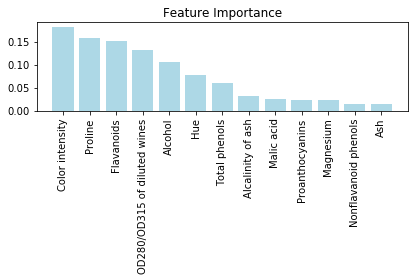

In [6]:
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), importance[indices], color='lightblue', align='center')
plt.xticks(range(X_train.shape[1]), feat_columns[indices], rotation=90)
plt.xlim(-1, X_train.shape[1])
plt.tight_layout()
plt.show()

In [18]:
selected_indices = np.where(importance >= 0.15)
X_selected = X_train[X_train.columns[selected_indices]]
print(X_selected.shape)

(124, 3)
